In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 读駅 CSY 女件
data= pd.read_csv("data/demand_train.csv",  encoding="gbk")
# 诲看数振基本信息print(”数据基本信息:”)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183595 entries, 0 to 1183594
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   过账日期    1183595 non-null  object 
 1   需求量     1183595 non-null  float64
 2   工厂编码    1183595 non-null  int64  
 3   物料编码    1183595 non-null  int64  
 4   物料品牌    1183595 non-null  int64  
 5   物料类型    1183595 non-null  int64  
 6   物料品类    1183595 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 63.2+ MB


In [5]:
# 查看数据行数和列数
rows,columns=data.shape
if rows < 1000:#少午 1000 行数据《少量数据)查看全量数据信息print(”数据全部内容信息:”)
    print(data.to_csv(sep='\t', na_rep='nan'))
else:#大量数据盘看数据输几行信息print(”数据前几行内容信息:”)
    print(data.head().to_csv(sep='\t', na_rep='nan'))

	过账日期	需求量	工厂编码	物料编码	物料品牌	物料类型	物料品类
0	2018-01-06 00:00:00	0.33	2004	1000	5000	3002	4014
1	2018-01-08 00:00:00	0.09	2010	1000	5000	3002	4014
2	2018-01-09 00:00:00	0.09	2008	1000	5000	3002	4014
3	2018-01-10 00:00:00	0.1	2010	1000	5000	3002	4014
4	2018-01-11 00:00:00	0.17	2004	1000	5000	3002	4014



In [10]:
import pandas as pd
# 读舰 CSY 女件
data= pd.read_csv("data/demand_train.csv",  encoding="gbk")
# 按工厂鑰码分绍
grouped = data.groupby('工厂编码')
#追历每个工厂组
for factory_code, group in grouped:
    #生成文件名，以工厂编妈命名
    file_name = f'data/sep/factory_{factory_code}.csv'#将每个工厂的数据保存为单独的 CSV 文件
    group.to_csv(file_name, index=False)
    print(f'{file_name}文件已保存。')

data/sep/factory_2000.csv文件已保存。
data/sep/factory_2001.csv文件已保存。
data/sep/factory_2002.csv文件已保存。
data/sep/factory_2003.csv文件已保存。
data/sep/factory_2004.csv文件已保存。
data/sep/factory_2005.csv文件已保存。
data/sep/factory_2006.csv文件已保存。
data/sep/factory_2007.csv文件已保存。
data/sep/factory_2008.csv文件已保存。
data/sep/factory_2009.csv文件已保存。
data/sep/factory_2010.csv文件已保存。
data/sep/factory_2011.csv文件已保存。
data/sep/factory_2012.csv文件已保存。
data/sep/factory_2013.csv文件已保存。
data/sep/factory_2014.csv文件已保存。
data/sep/factory_2015.csv文件已保存。


每个工厂的数据量:
工厂编码
2000    266320
2001     27945
2002     73959
2003     39360
2004     78502
2005     75030
2006     44816
2007     42944
2008     50851
2009     35165
2010    110568
2011    170195
2012     43728
2013     32507
2014     23533
2015     68172
dtype: int64


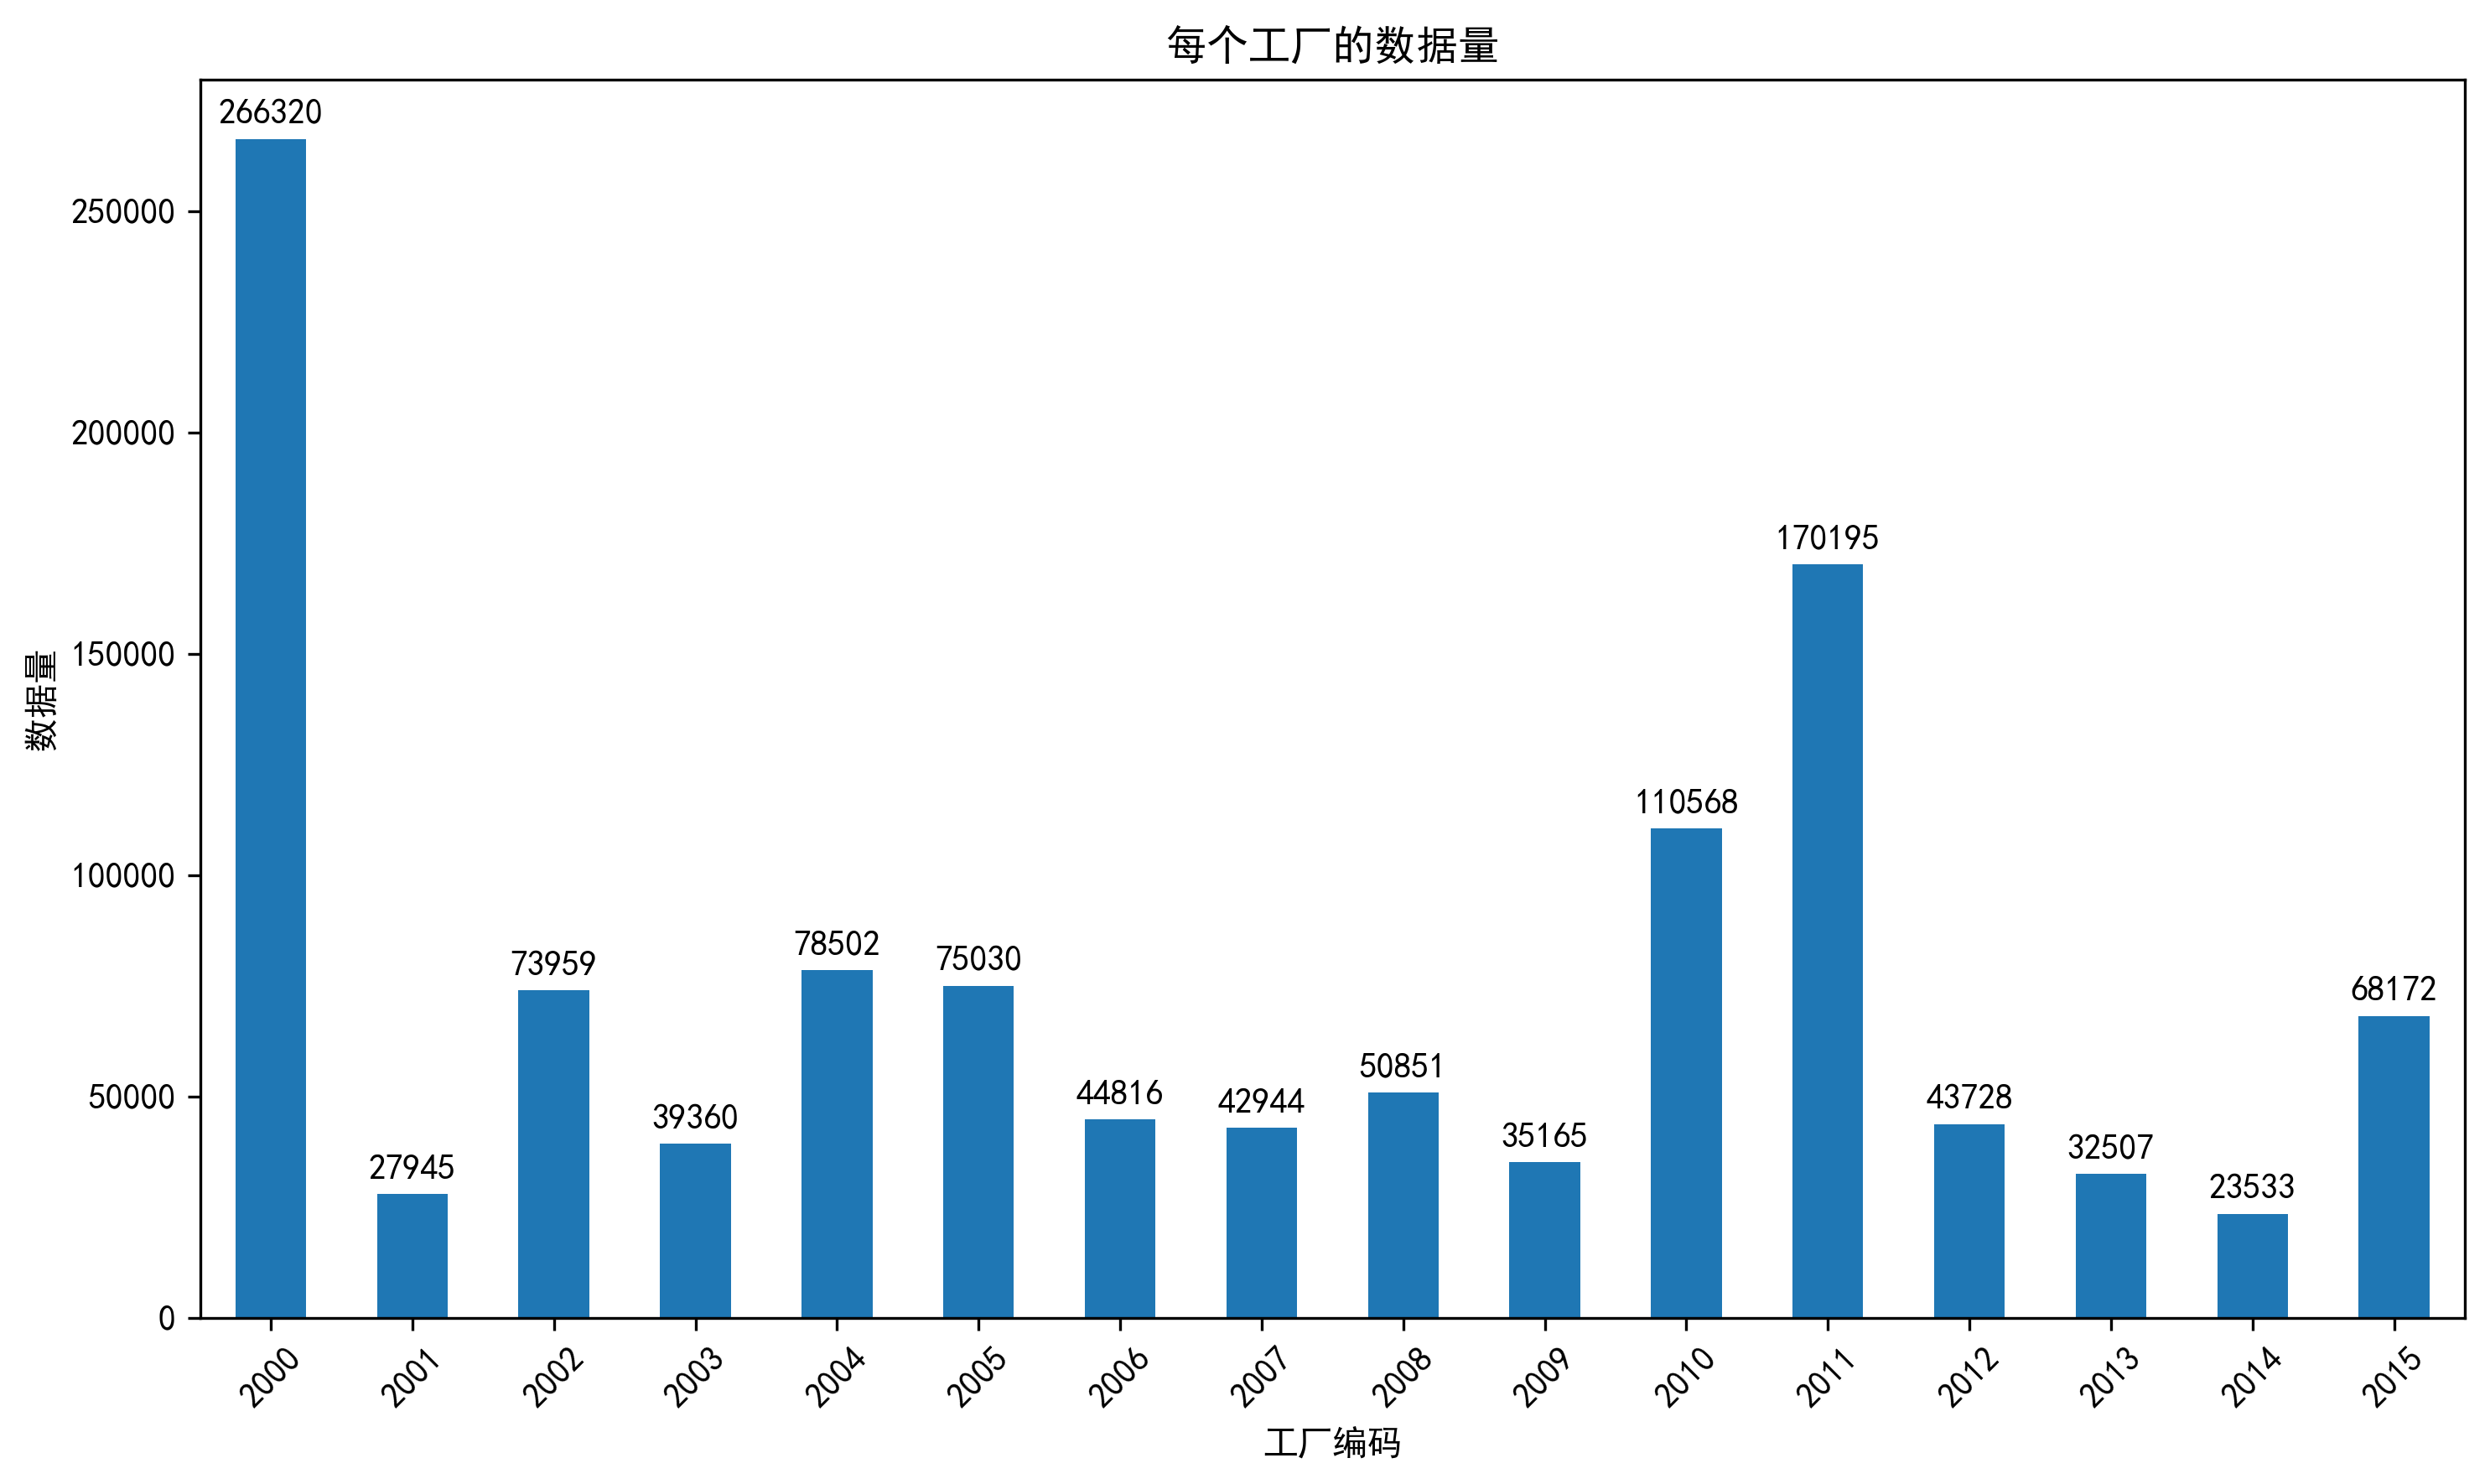

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 修正字体名称和参数名
plt.rcParams['axes.unicode_minus'] = False   # 修复负号显示问题

# 读取数据
data = pd.read_csv('data/demand_train.csv',  encoding="gbk")

# 统计每个工厂的数据量
factory_data_counts = data.groupby('工厂编码').size()

# 输出数据量统计
print('每个工厂的数据量:')
print(factory_data_counts)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 创建绘图画布
plt.figure(figsize=(10, 6))
bars = factory_data_counts.plot(kind='bar')

# 设置图表标题和坐标轴标签
plt.title('每个工厂的数据量')
plt.xlabel('工厂编码')
plt.ylabel('数据量')
plt.xticks(rotation=45)

# 添加数据标签
for bar in bars.patches:
    height = bar.get_height()
    plt.annotate(f'{height}',  # 修正字符串格式化语法
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()  # 自动调整布局
plt.show()

In [12]:
data = pd.read_csv('data/sep/factory_2000.csv')

In [13]:
# 统计各特征的唯一值数量
unique_counts = {
    '工厂编码': data['工厂编码'].nunique(),
    '物料编码': data['物料编码'].nunique(),
    '物料品牌': data['物料品牌'].nunique(),
    '物料类型': data['物料类型'].nunique(),
    '物料品类': data['物料品类'].nunique()
}

# 打印结果
print("各特征的唯一值数量：")
for feature, count in unique_counts.items():
    print(f"{feature}: {count}")

各特征的唯一值数量：
工厂编码: 1
物料编码: 83
物料品牌: 6
物料类型: 3
物料品类: 17


In [14]:
import pandas as pd
import itertools

# 定义特征列表
features = ['工厂编码', '物料编码', '物料品牌', '物料类型', '物料品类']

# 生成特征组合对（修正拼写错误）
feature_pairs = list(itertools.combinations(features, 2))  # 修正为正确的combinations

# 检查每对特征之间的对应关系
for pair in feature_pairs:
    feature1, feature2 = pair
    # 分组统计每个feature1对应的feature2唯一值数量（修正语法）
    unique_counts = data.groupby(feature1)[feature2].nunique()  # 修正为正确的groupby()
    
    # 检查是否所有feature1都只对应一个feature2
    is_one_to_one = (unique_counts == 1).all()
    
    if is_one_to_one:
        print(f"\n{feature1} 和 {feature2} 是一一对应的。")
    else:
        print(f"\n{feature1} 和 {feature2} 不是一一对应的。")
        # 打印对应多个feature2的feature1情况
        non_one_to_one = unique_counts[unique_counts > 1]
        print(f"存在 {len(non_one_to_one)} 个{feature1}对应多个{feature2}：")
        
        for key, value in non_one_to_one.items():
            corresponding_values = data[data[feature1] == key][feature2].unique()
            print(f"  {feature1}为 {key} 时，对应{feature2}值有：{', '.join(map(str, corresponding_values))}")

# 添加中文字体支持（如果尚未设置）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


工厂编码 和 物料编码 不是一一对应的。
存在 1 个工厂编码对应多个物料编码：
  工厂编码为 2000 时，对应物料编码值有：1001, 1003, 1014, 1021, 1027, 1029, 1031, 1034, 1037, 1038, 1040, 1042, 1044, 1045, 1048, 1049, 1051, 1052, 1054, 1067, 1074, 1077, 1091, 1143, 1144, 1145, 1146, 1154, 1156, 1184, 1186, 1193, 1194, 1208, 1210, 1214, 1218, 1219, 1222, 1239, 1241, 1242, 1053, 1089, 1035, 1033, 1061, 1240, 1006, 1010, 1230, 1264, 1020, 1019, 1272, 1238, 1209, 1201, 1160, 1205, 1221, 1153, 1200, 1198, 1050, 1046, 1215, 1223, 1183, 1188, 1151, 1185, 1147, 1150, 1197, 1216, 1187, 1252, 1189, 1213, 1196, 1195, 1217

工厂编码 和 物料品牌 不是一一对应的。
存在 1 个工厂编码对应多个物料品牌：
  工厂编码为 2000 时，对应物料品牌值有：5000, 5001, 5008, 5010, 5007, 5012

工厂编码 和 物料类型 不是一一对应的。
存在 1 个工厂编码对应多个物料类型：
  工厂编码为 2000 时，对应物料类型值有：3002, 3003, 3000

工厂编码 和 物料品类 不是一一对应的。
存在 1 个工厂编码对应多个物料品类：
  工厂编码为 2000 时，对应物料品类值有：4006, 4005, 4008, 4014, 4010, 4009, 4002, 4013, 4011, 4000, 4022, 4023, 4012, 4001, 4017, 4016, 4015

物料编码 和 物料品牌 是一一对应的。

物料编码 和 物料类型 是一一对应的。

物料编码 和 物料品类 是一一对应的。

物料品牌 和 物料类型 不是一一对应的。
存

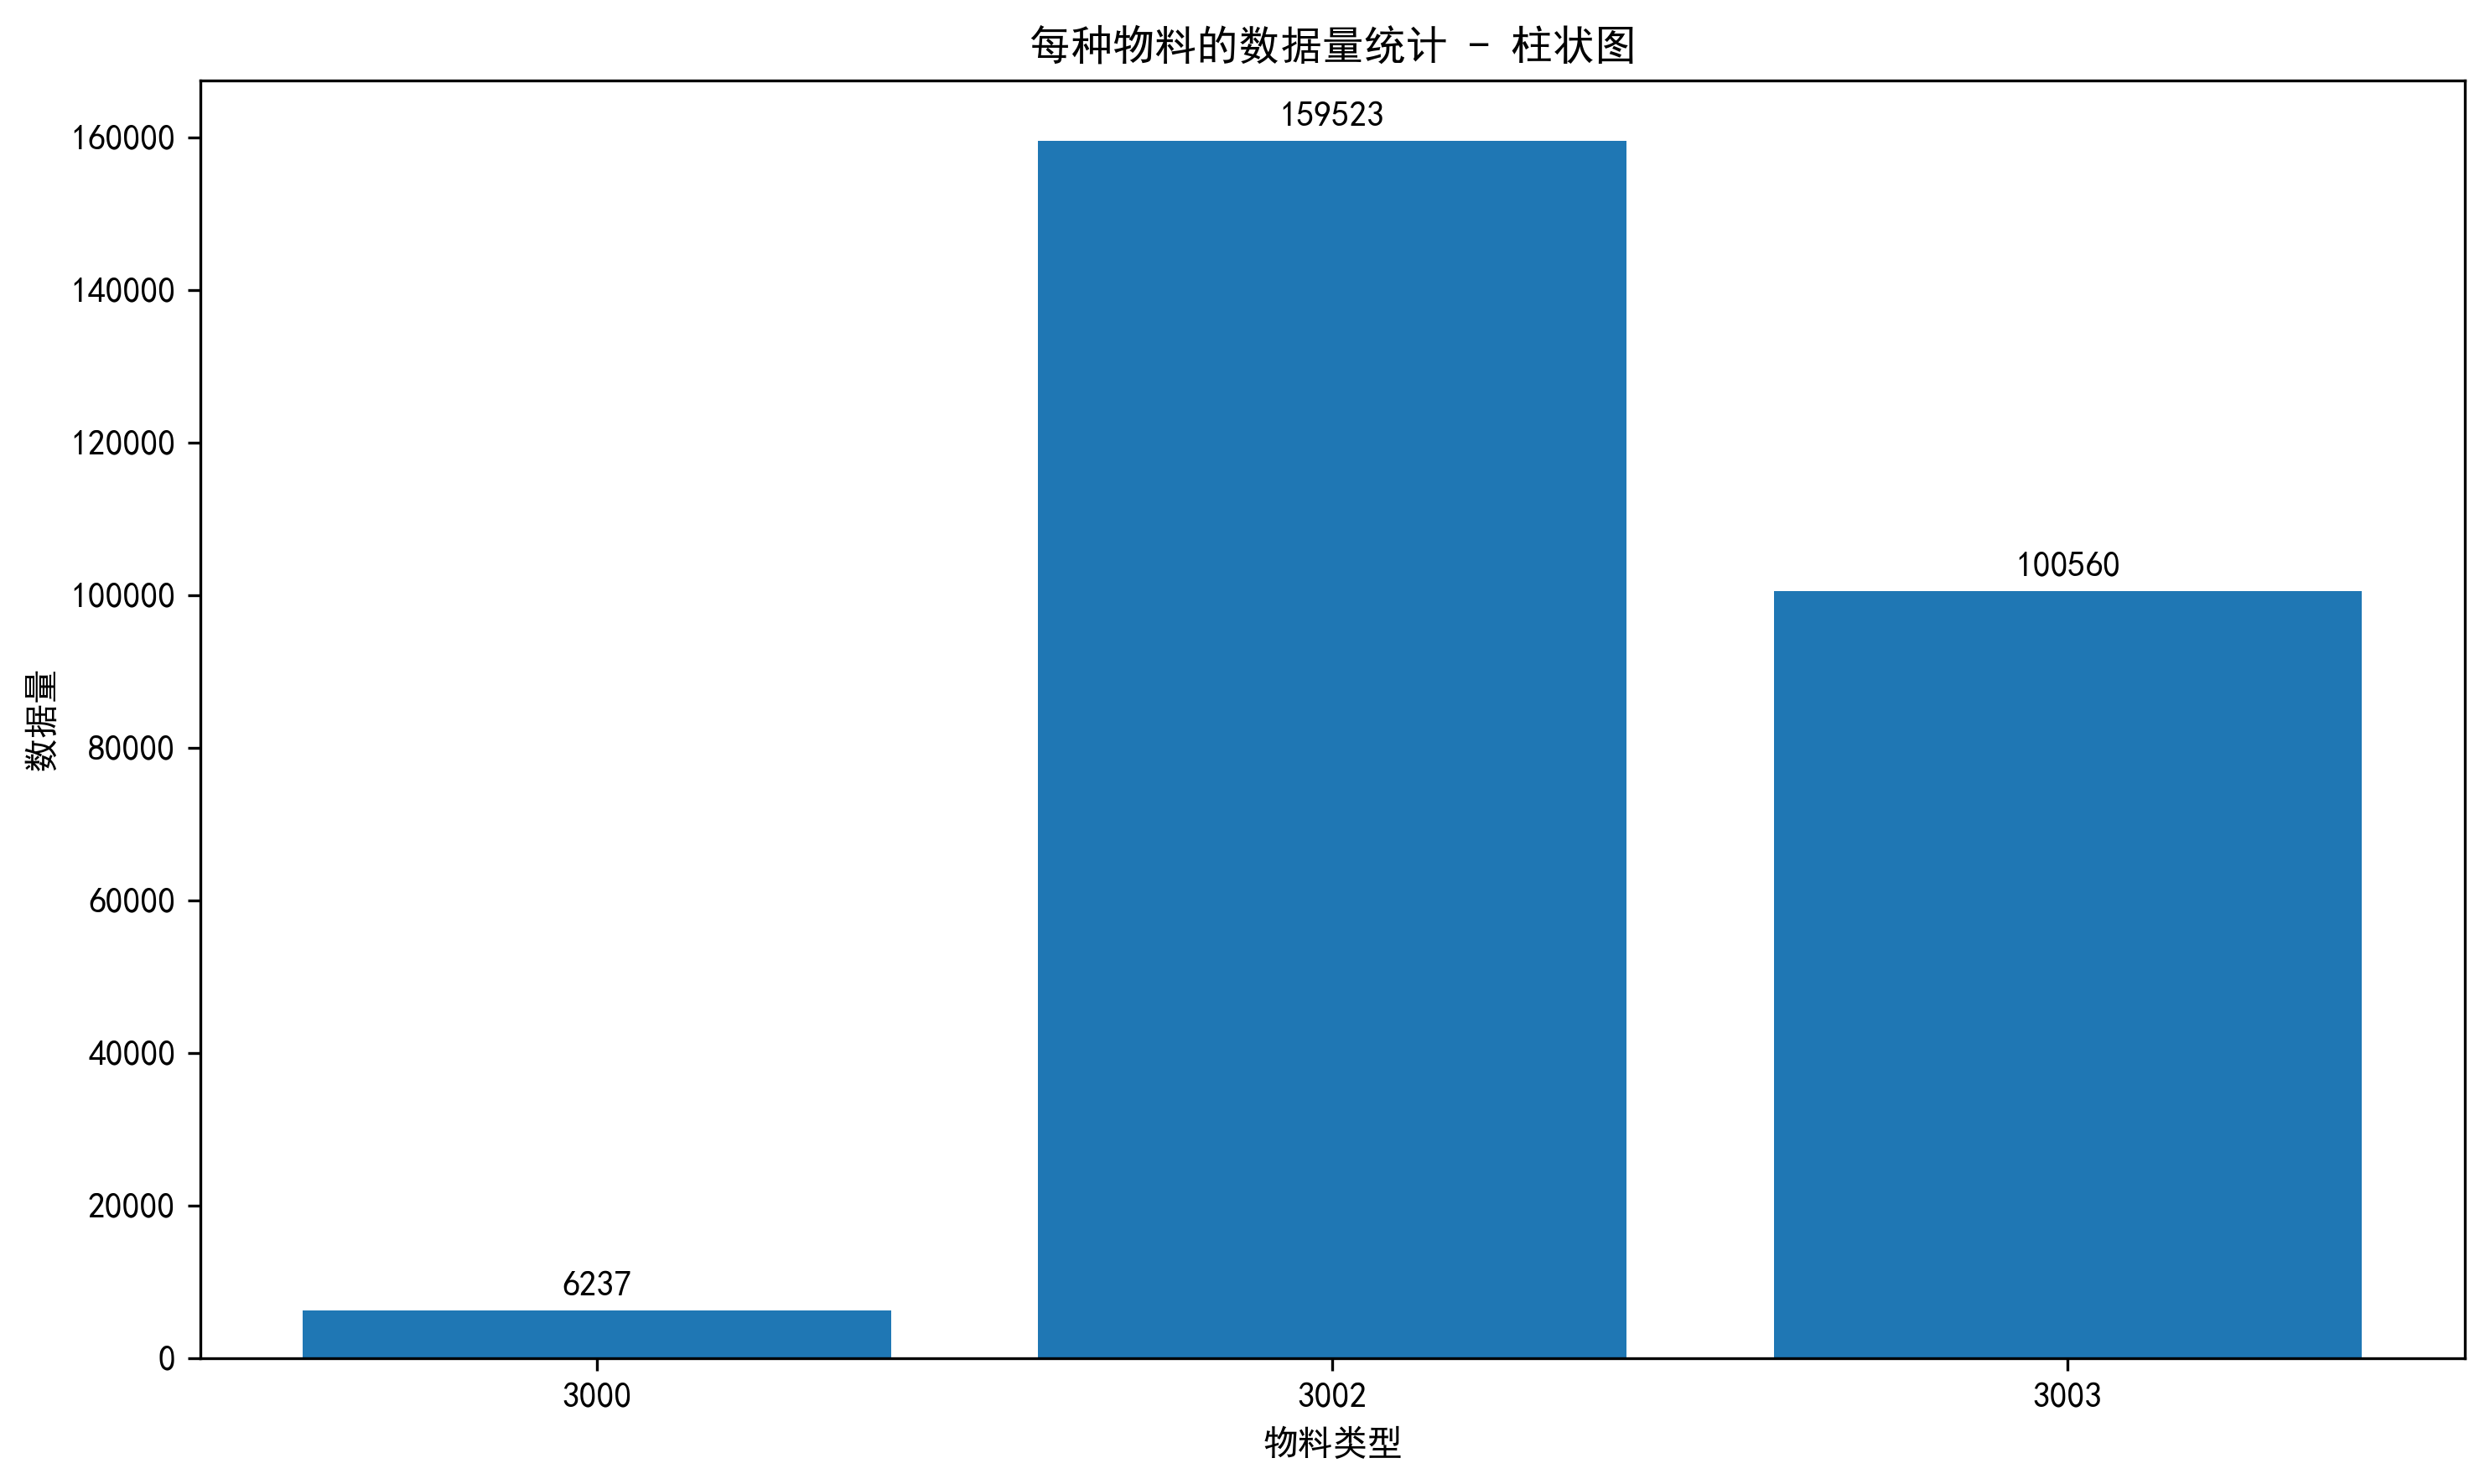

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('data/sep/factory_2000.csv')

# 定义要统计的物料类型列表
target_materials = [3002, 3003, 3000]

# 筛选出三种物料的数据
filtered_data = data[data['物料类型'].isin(target_materials)]

# 统计每种物料的数据量
material_counts = filtered_data.groupby('物料类型').size()

# 设置图片参数
plt.rcParams.update({
    'figure.dpi': 300,                    # 设置清晰度
    'font.sans-serif': ['SimHei'],         # 修正参数名和符号
    'axes.unicode_minus': False
})

# 创建画布
plt.figure(figsize=(10, 6))
bars = plt.bar(
    material_counts.index.astype(str),     # 确保x轴标签为字符串
    material_counts.values,
    color='#1f77b4'                       # 添加标准颜色
)

# 设置图表元素
plt.title('每种物料的数据量统计 - 柱状图')
plt.xlabel('物料类型')
plt.ylabel('数据量')
plt.xticks(rotation=0)

# 添加数据标签
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',              # 修正字符串格式化
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()  # 自动调整布局
plt.show()

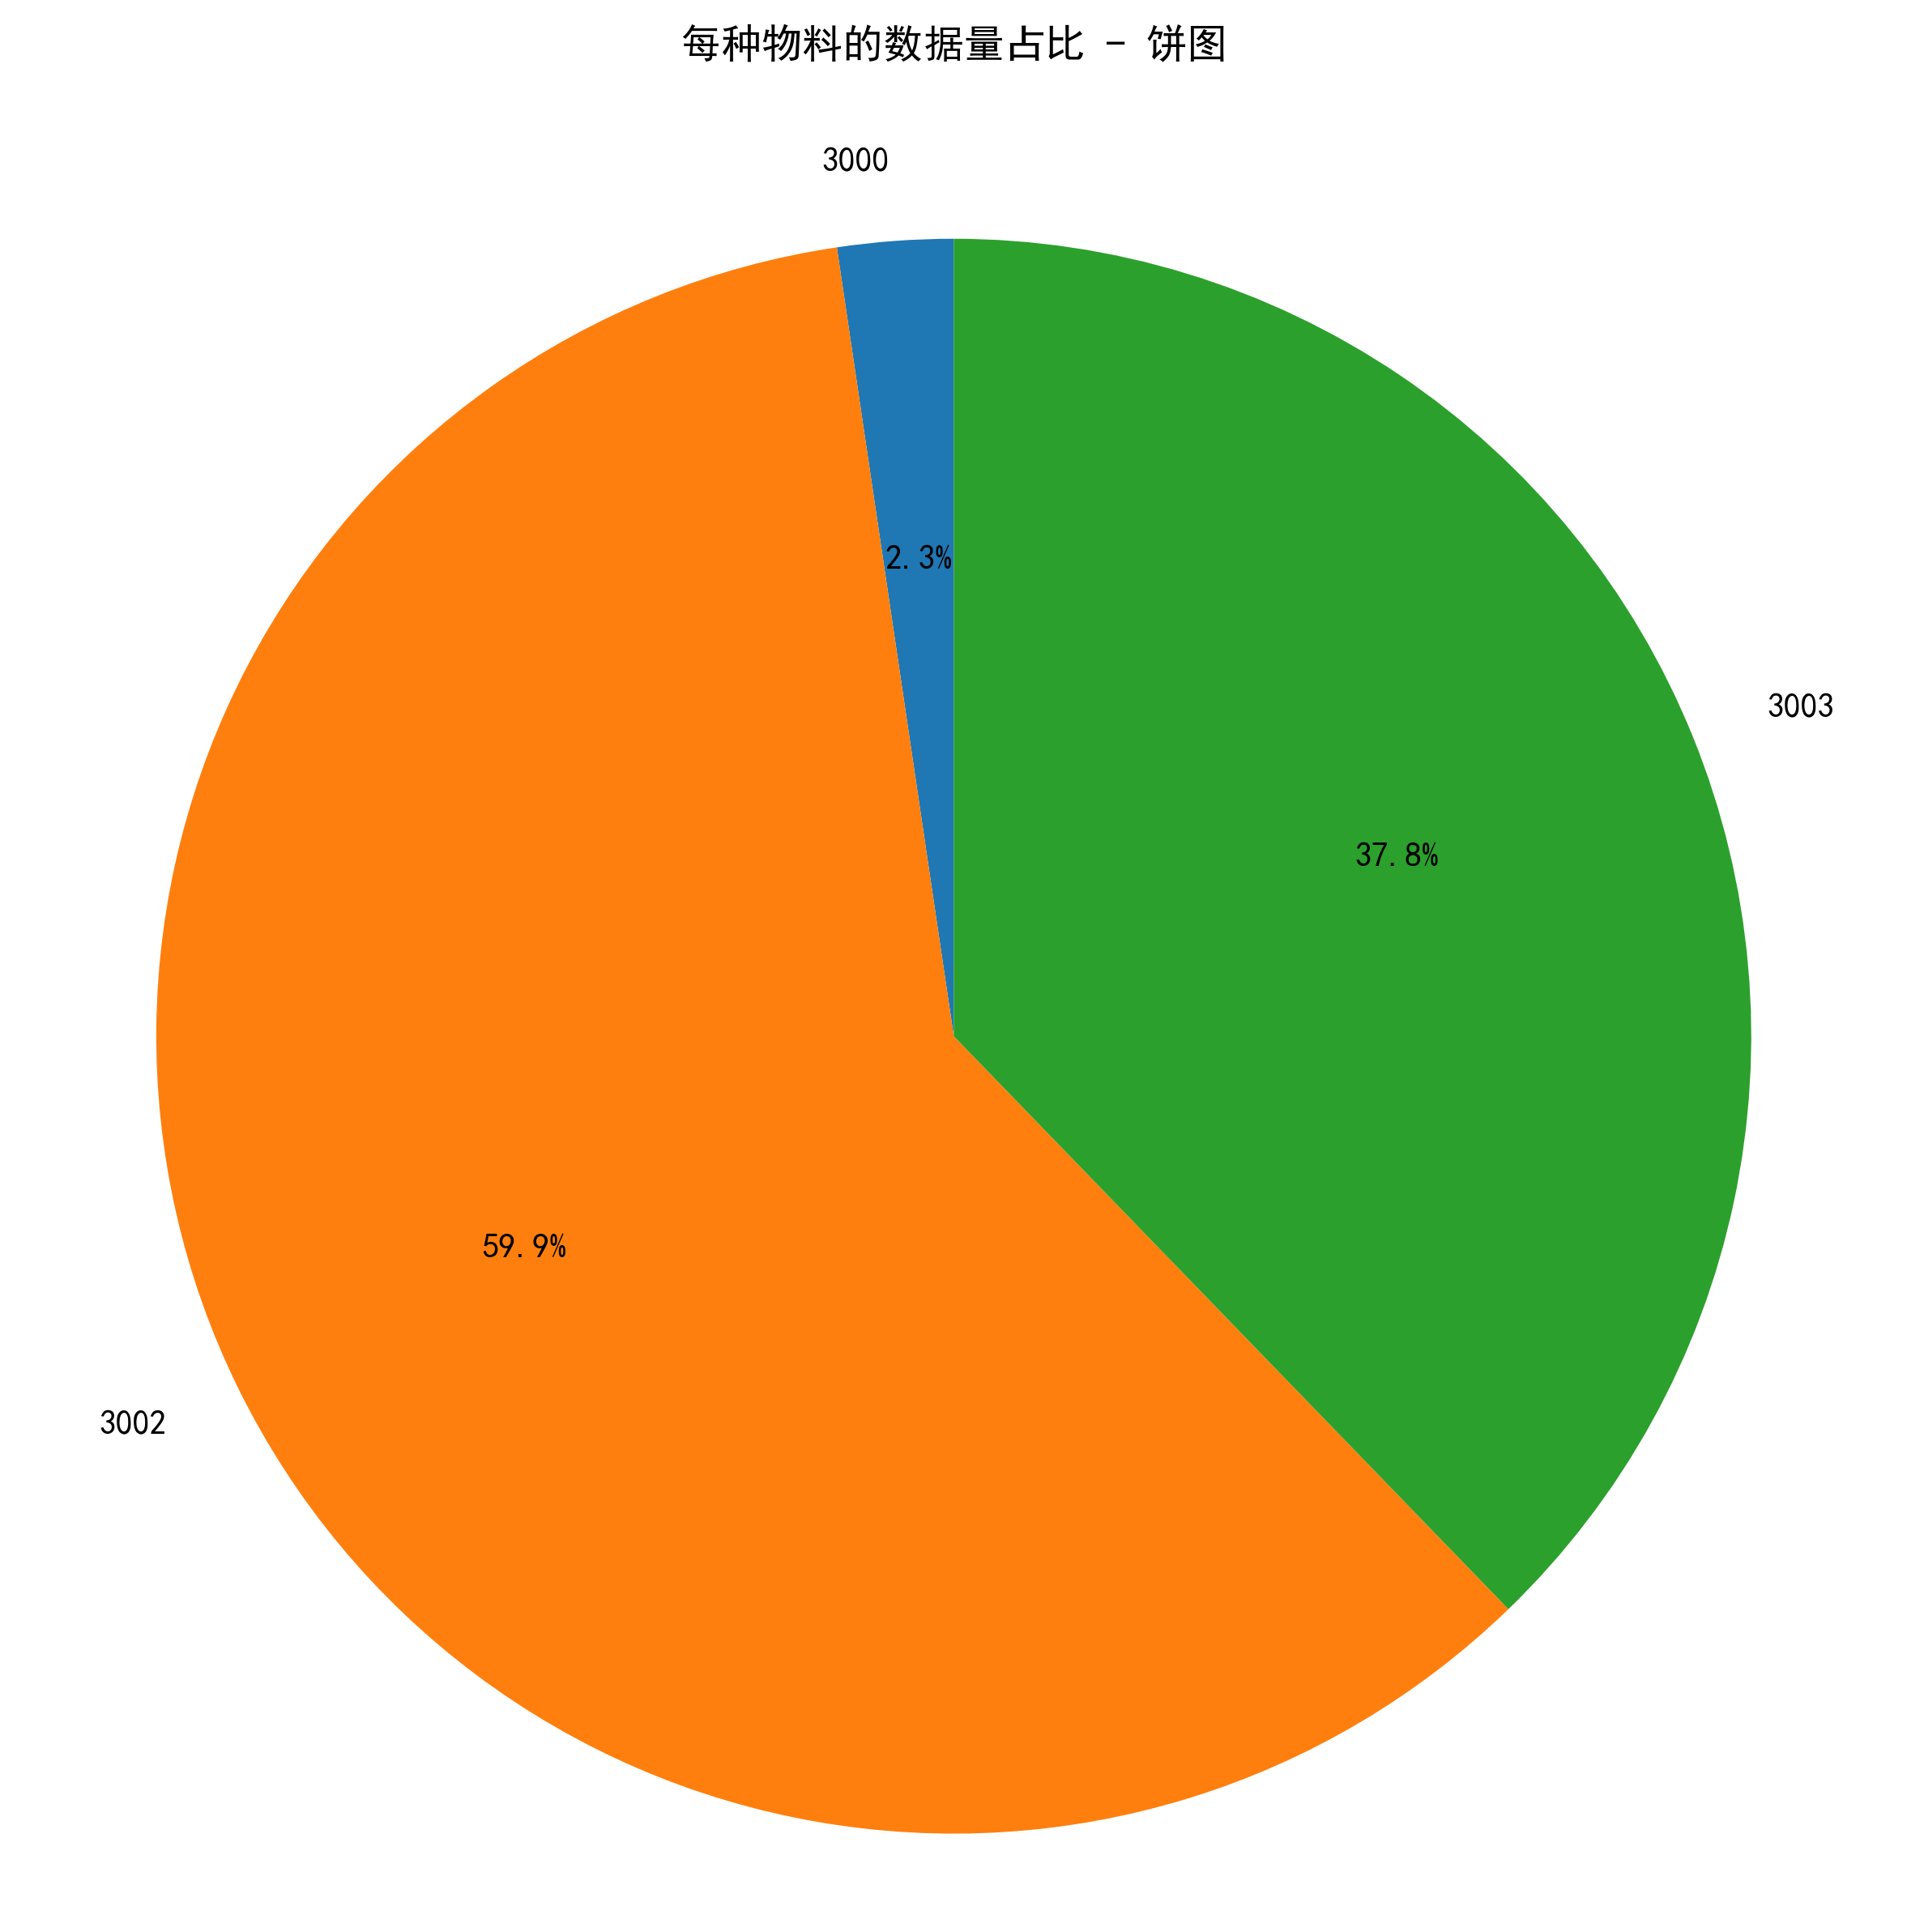

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('data/sep/factory_2000.csv')

# 定义要统计的物料类型列表
target_materials = [3002, 3003, 3000]

# 筛选出三种物料的数据
filtered_data = data[data['物料类型'].isin(target_materials)]

# 统计每种物料的数据量
material_counts = filtered_data.groupby('物料类型').size()

# 设置图片参数
plt.rcParams.update({
    'figure.dpi': 300,                    # 设置清晰度
    'font.sans-serif': ['SimHei'],         # 修正字体名称和参数名
    'axes.unicode_minus': False
})

# 创建画布
plt.figure(figsize=(8, 8))

# 绘制饼图
patches, texts, autotexts = plt.pie(
    material_counts.values,
    labels=material_counts.index.astype(str),
    autopct='%1.1f%%',                    # 修正百分比格式
    startangle=90,                        # 设置起始角度
    textprops={'fontsize': 10}            # 设置文本大小
)

# 设置标题
plt.title('每种物料的数据量占比 - 饼图', y=1.05)

# 优化显示
plt.axis('equal')  # 保证饼图是正圆形
plt.tight_layout()
plt.show()

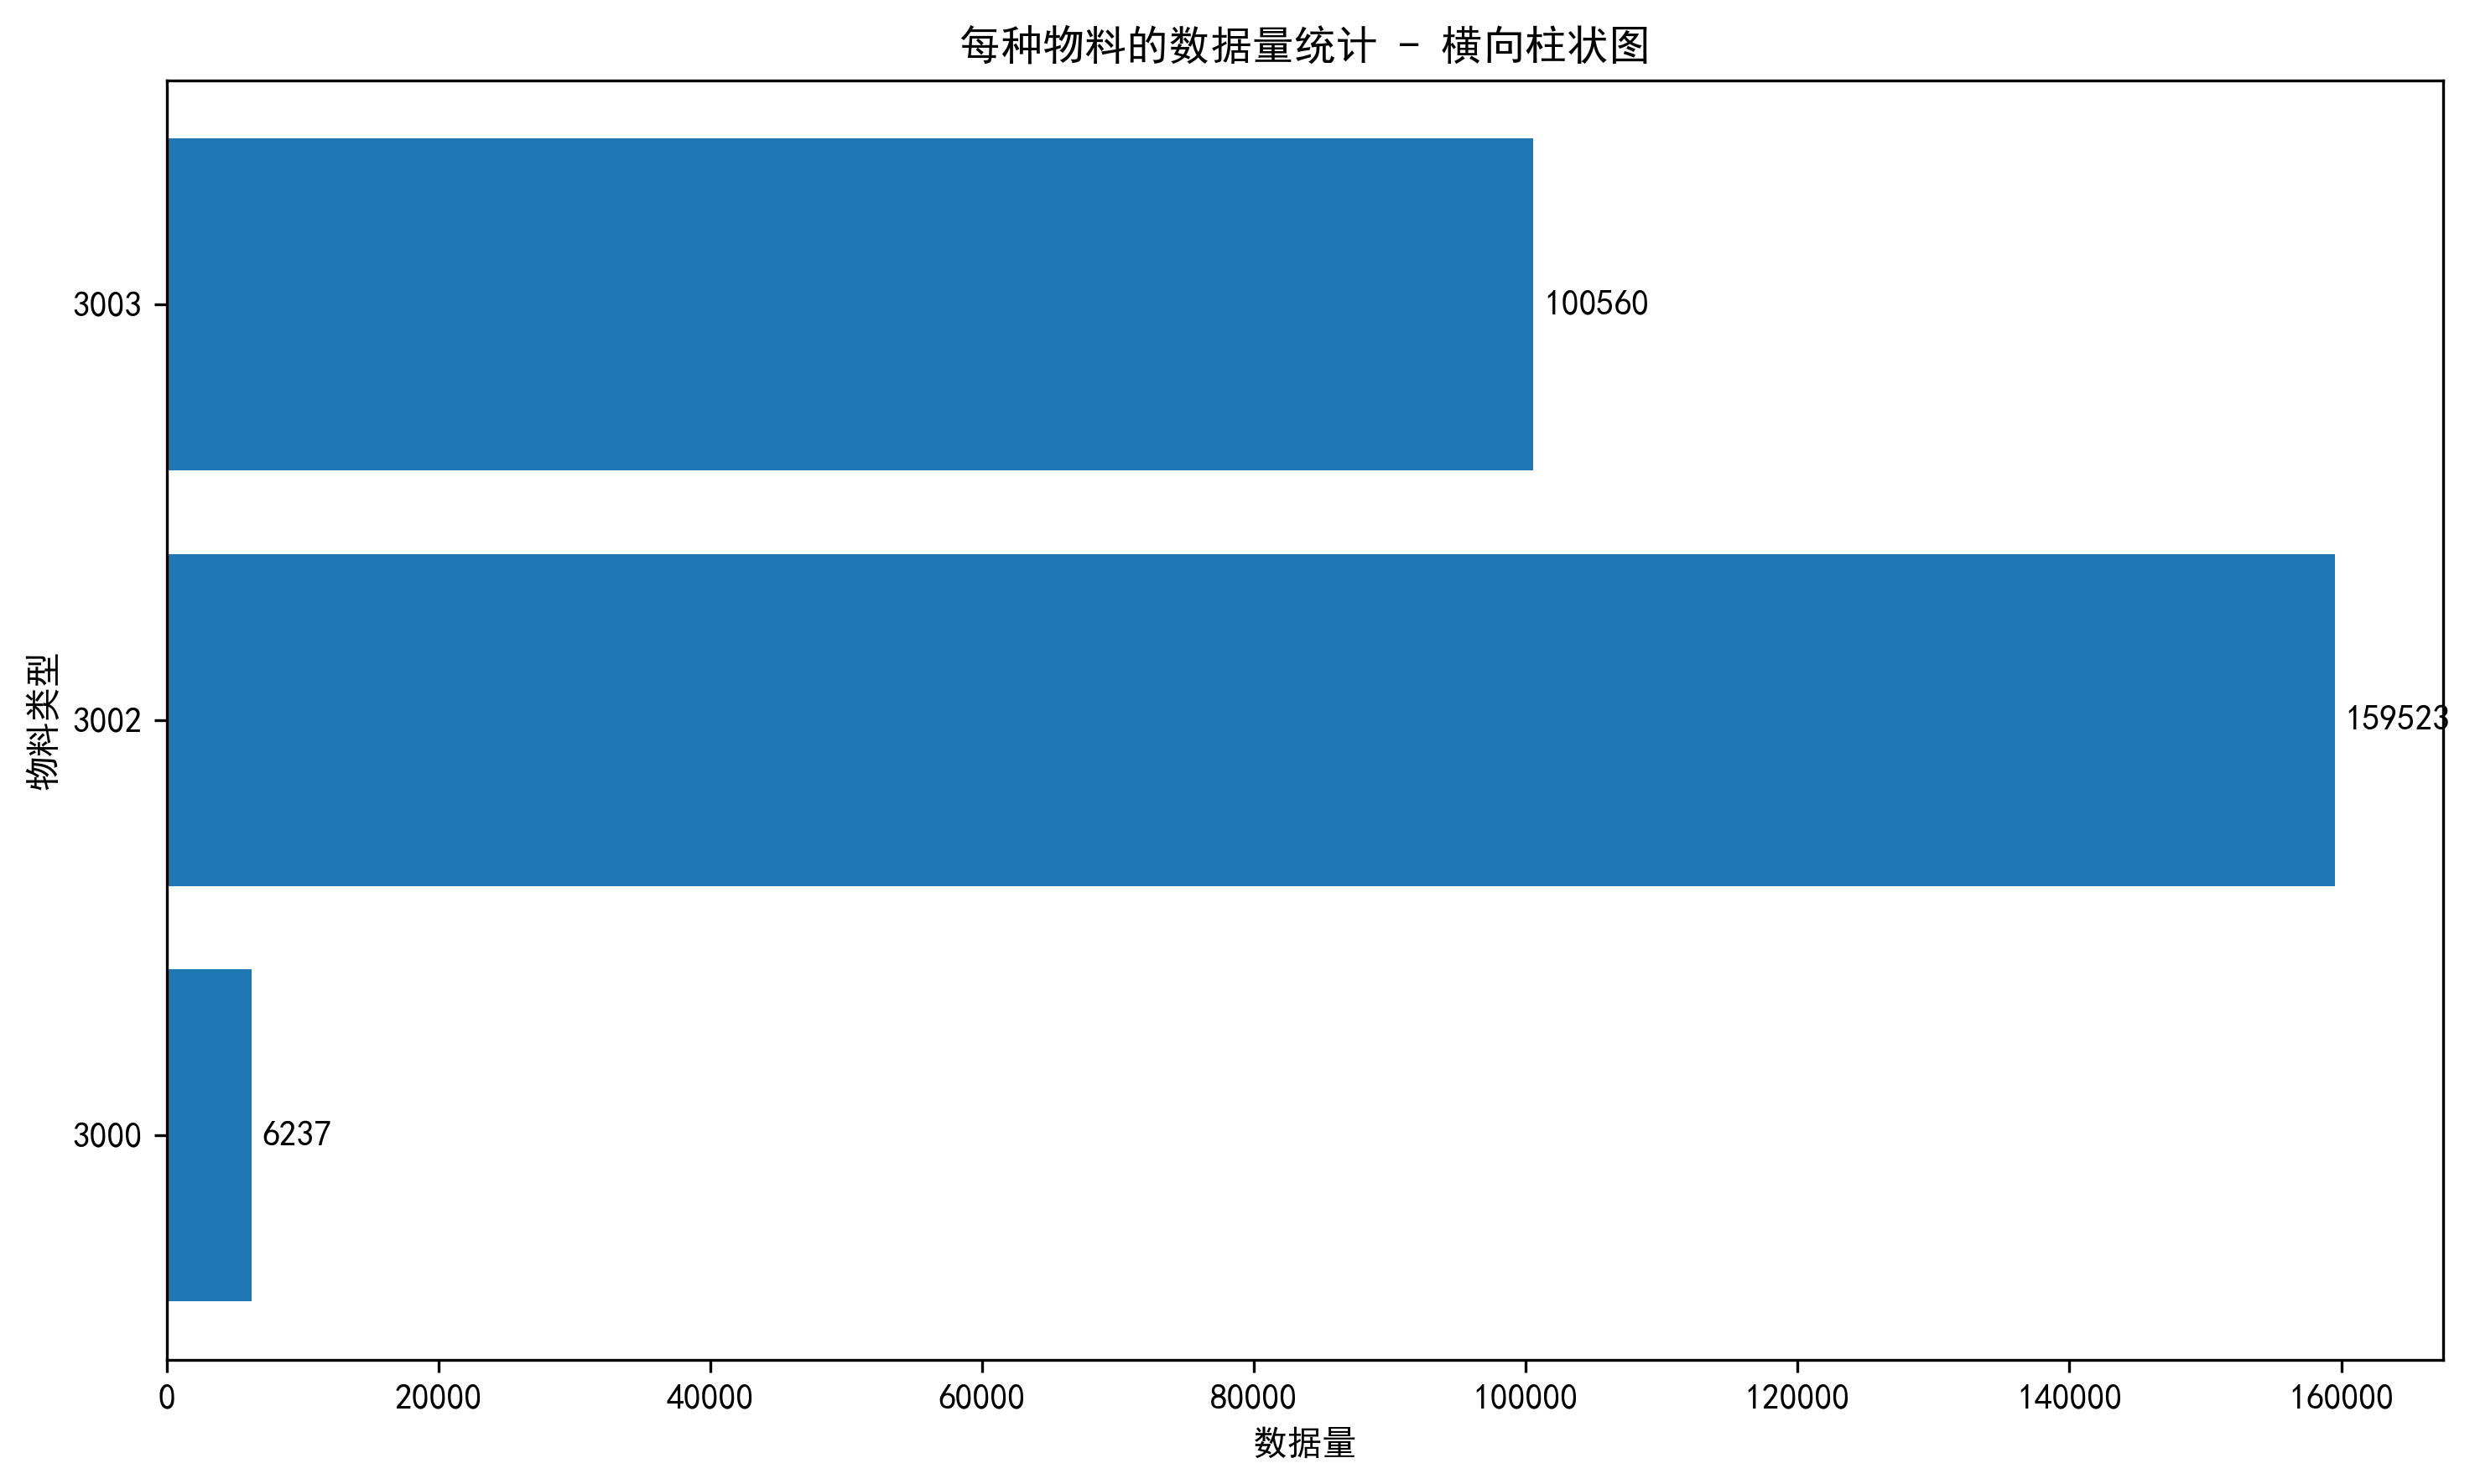

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('data/sep/factory_2000.csv')

# 定义要统计的物料类型列表
target_materials = [3002, 3003, 3000]

# 筛选出三种物料的数据
filtered_data = data[data['物料类型'].isin(target_materials)]

# 统计每种物料的数据量
material_counts = filtered_data.groupby('物料类型').size()

# 设置图片参数
plt.rcParams.update({
    'figure.dpi': 300,
    'font.sans-serif': ['SimHei'],  # 修正字体名称
    'axes.unicode_minus': False
})

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制横向柱状图（修正方法名和参数顺序）
bars = plt.barh(
    y=material_counts.index.astype(str),  # y轴为分类数据
    width=material_counts.values,         # x轴为数值
    color='#1f77b4'                       # 添加颜色
)

# 设置图表元素
plt.title('每种物料的数据量统计 - 横向柱状图')
plt.xlabel('数据量')  # x轴为数值
plt.ylabel('物料类型')  # y轴为分类

# 添加数据标签
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{width}',              # 修正字符串格式化
                xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(3, 0),            # 水平偏移3点
                textcoords="offset points",
                ha='left', va='center')

plt.tight_layout()  # 优化布局
plt.show()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266320 entries, 0 to 266319
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   过账日期    266320 non-null  object 
 1   需求量     266320 non-null  float64
 2   工厂编码    266320 non-null  int64  
 3   物料编码    266320 non-null  int64  
 4   物料品牌    266320 non-null  int64  
 5   物料类型    266320 non-null  int64  
 6   物料品类    266320 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 14.2+ MB


In [22]:
filtered_data = data[data['物料类型']==3002]

In [23]:
import pandas as pd
import itertools

# 定义特征列表
features = ['工厂编码', '物料编码', '物料品牌', '物料类型', '物料品类']
data = filtered_data  # 确保已定义filtered_data

# 生成特征对组合
feature_pairs = list(itertools.combinations(features, 2))

# 检查每对特征之间的对应关系
for pair in feature_pairs:
    feature1, feature2 = pair  # 修正变量名拼写
    # 分组统计每个feature1对应的feature2唯一值数量
    unique_counts = data.groupby(feature1)[feature2].nunique()
    
    # 检查是否一一对应
    is_one_to_one = (unique_counts == 1).all()
    
    if is_one_to_one:
        print(f"\n{feature1} 和 {feature2} 是一一对应的。")
    else:
        print(f"\n{feature1} 和 {feature2} 不是一一对应的。")
        # 打印非一一对应的情况
        non_one_to_one = unique_counts[unique_counts > 1]
        print(f"存在 {len(non_one_to_one)} 个{feature1}对应多个{feature2}：")
        
        for key, value in non_one_to_one.items():
            corresponding_values = data[data[feature1] == key][feature2].unique()
            print(f"  {feature1}为 {key} 时，对应{feature2}值有：{', '.join(map(str, corresponding_values))}")

# 设置中文字体（如果尚未设置）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


工厂编码 和 物料编码 不是一一对应的。
存在 1 个工厂编码对应多个物料编码：
  工厂编码为 2000 时，对应物料编码值有：1001, 1003, 1014, 1021, 1027, 1029, 1031, 1034, 1037, 1038, 1040, 1042, 1044, 1045, 1048, 1049, 1051, 1052, 1054, 1067, 1074, 1077, 1091, 1053, 1089, 1035, 1033, 1061, 1006, 1010, 1020, 1019, 1050, 1046, 1252

工厂编码 和 物料品牌 不是一一对应的。
存在 1 个工厂编码对应多个物料品牌：
  工厂编码为 2000 时，对应物料品牌值有：5000, 5001, 5008, 5010, 5007

工厂编码 和 物料类型 是一一对应的。

工厂编码 和 物料品类 不是一一对应的。
存在 1 个工厂编码对应多个物料品类：
  工厂编码为 2000 时，对应物料品类值有：4006, 4005, 4008, 4014, 4010, 4009, 4002, 4013

物料编码 和 物料品牌 是一一对应的。

物料编码 和 物料类型 是一一对应的。

物料编码 和 物料品类 是一一对应的。

物料品牌 和 物料类型 是一一对应的。

物料品牌 和 物料品类 不是一一对应的。
存在 3 个物料品牌对应多个物料品类：
  物料品牌为 5000 时，对应物料品类值有：4006, 4005, 4008, 4009, 4013, 4014
  物料品牌为 5001 时，对应物料品类值有：4014, 4006, 4010, 4009, 4002, 4008, 4013
  物料品牌为 5010 时，对应物料品类值有：4010, 4002, 4013

物料类型 和 物料品类 不是一一对应的。
存在 1 个物料类型对应多个物料品类：
  物料类型为 3002 时，对应物料品类值有：4006, 4005, 4008, 4014, 4010, 4009, 4002, 4013


物料类型为 3002 时，各物料品类的数据分布：
物料品类
4010    65124
4006    24212
4013    23916
4008    16802
4002    13133
4014    11686
4009     3901
4005      749
Name: count, dtype: int64


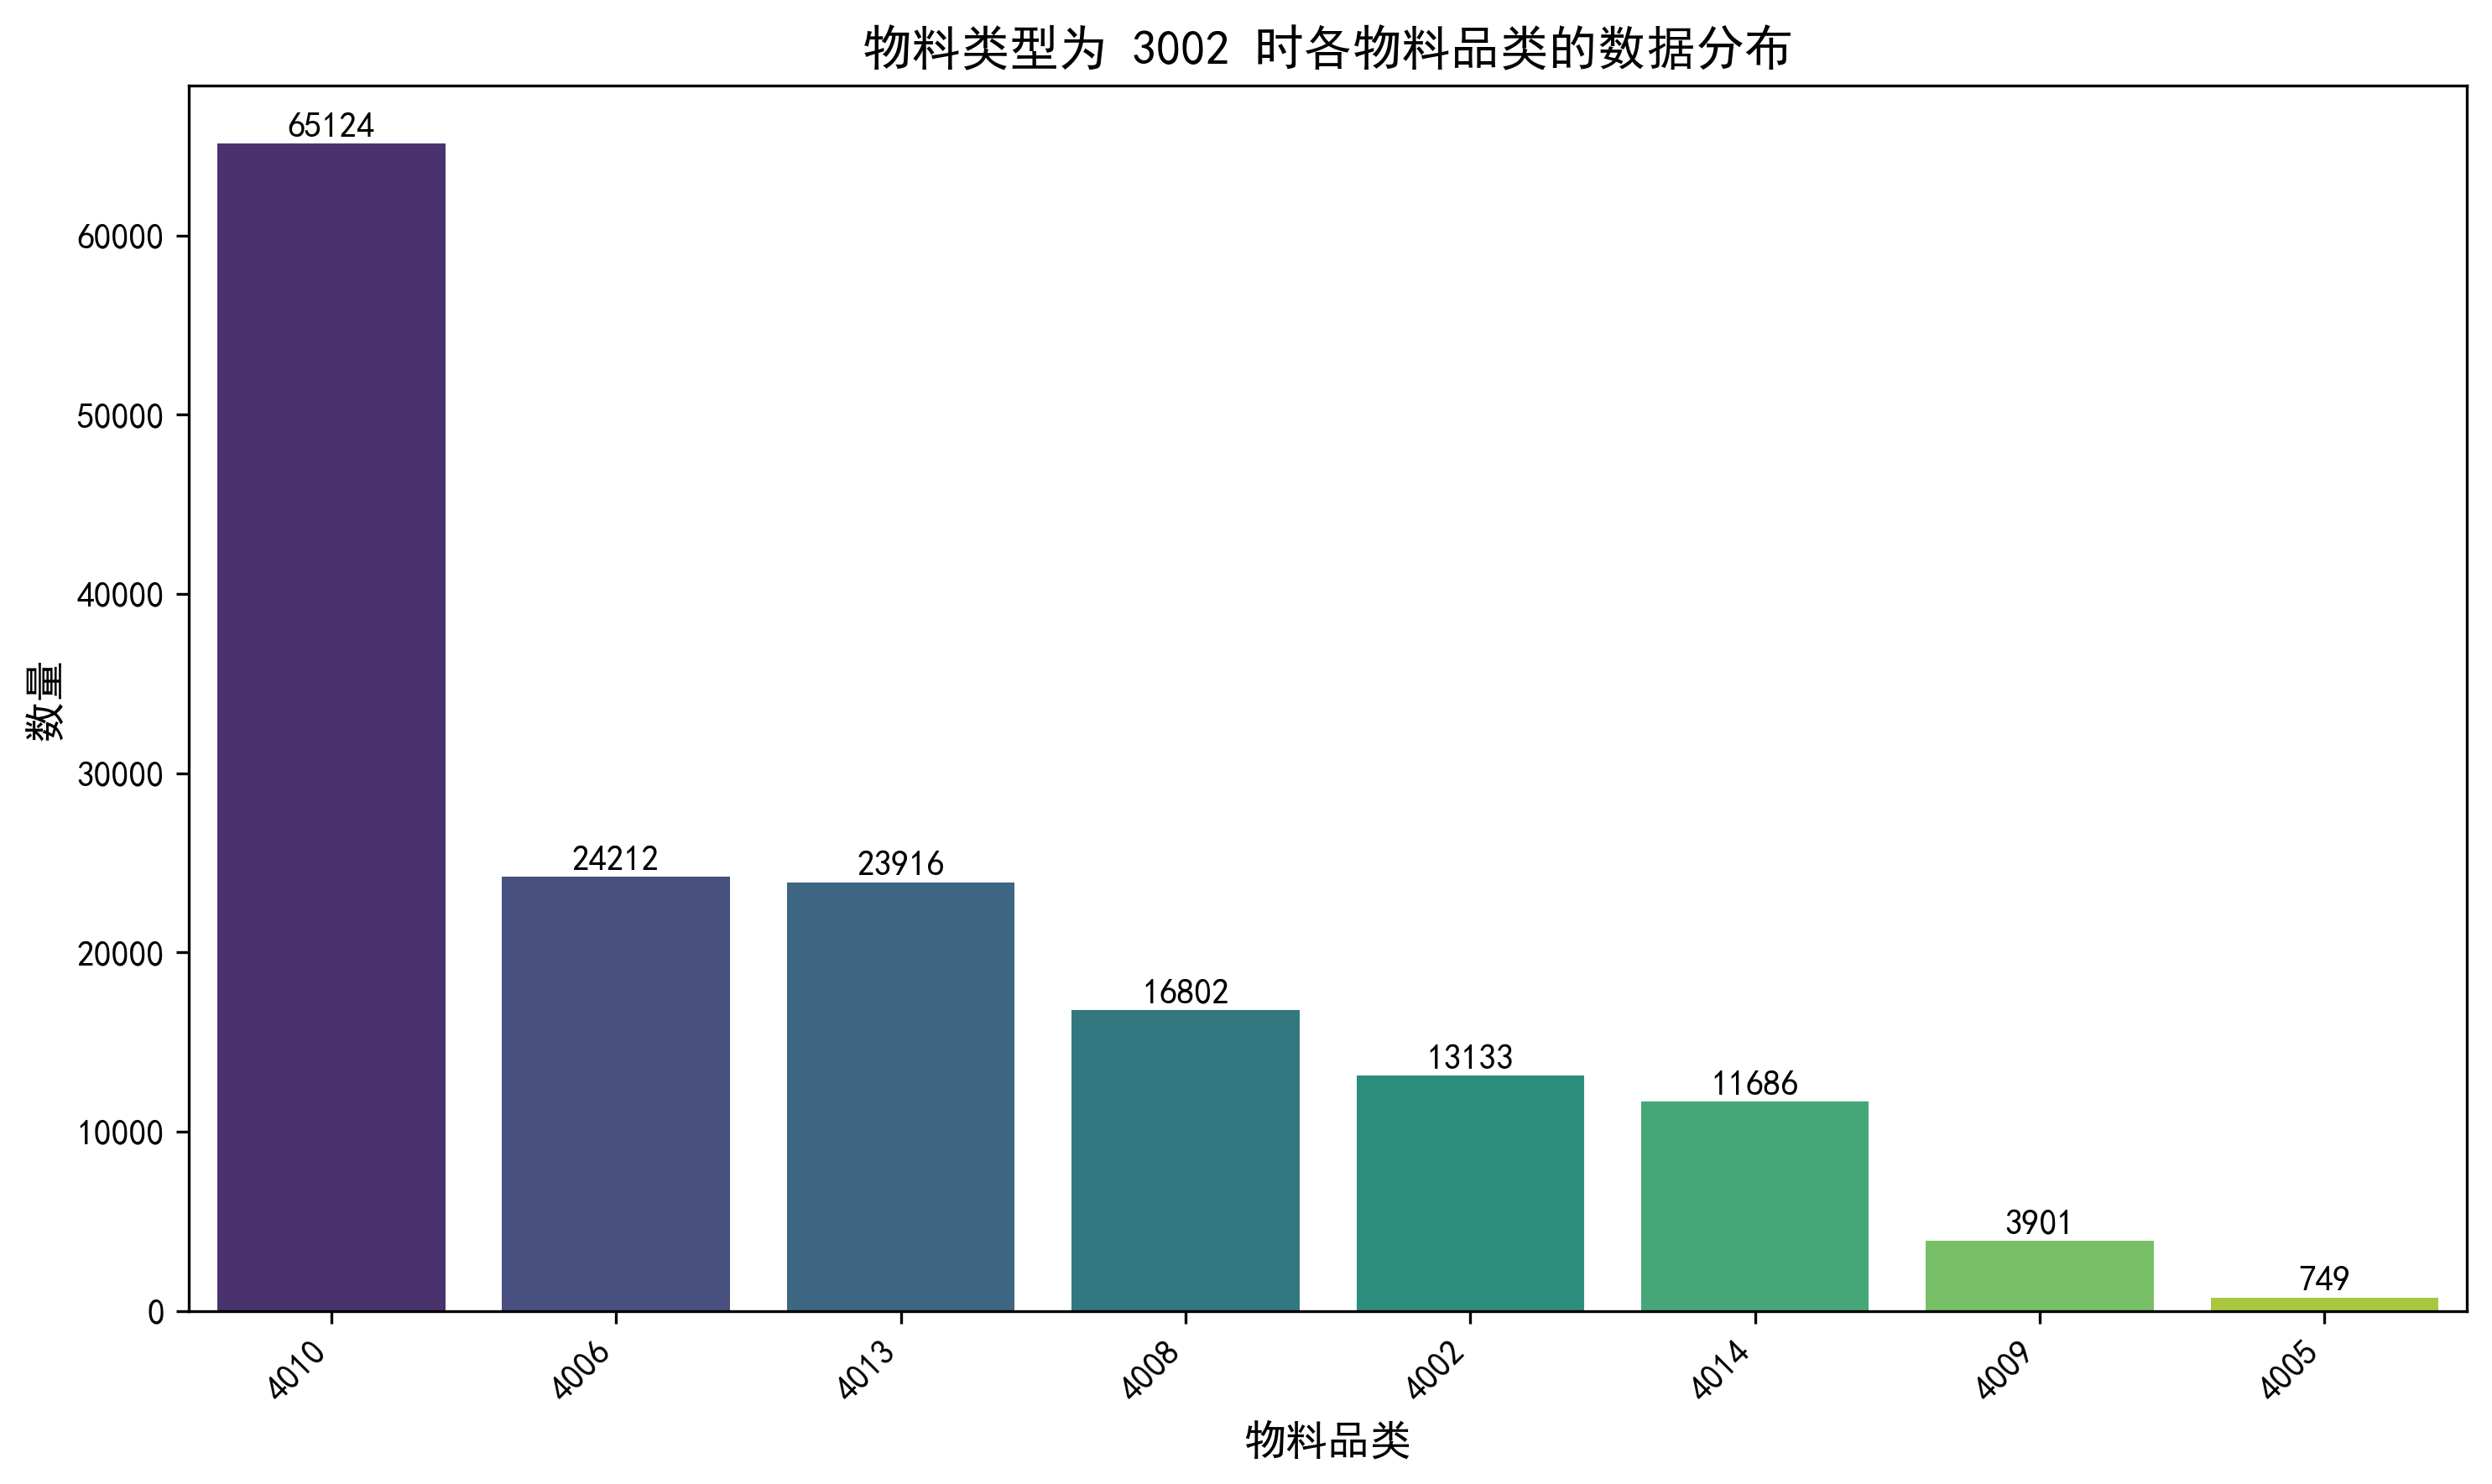

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据（需确保data已定义）
data = pd.read_csv('data/sep/factory_2000.csv')  # 根据实际文件路径修改

# 筛选物料类型为3002的数据
filtered_data = data[data['物料类型'] == 3002]

# 统计各物料品类的数量
category_distribution = filtered_data['物料品类'].value_counts()

# 输出统计结果
print('物料类型为 3002 时，各物料品类的数据分布：')
print(category_distribution)

# 设置图片参数
plt.rcParams.update({
    'figure.dpi': 300,
    'font.sans-serif': ['SimHei'],  # 修正字体设置
    'axes.unicode_minus': False
})

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制柱状图（使用Seaborn增强可视化）
ax = sns.barplot(
    x=category_distribution.index.astype(str),
    y=category_distribution.values,
    palette="viridis"  # 使用更美观的色系
)

# 设置图表元素
plt.title('物料类型为 3002 时各物料品类的数据分布', fontsize=14)
plt.xlabel('物料品类', fontsize=12)
plt.ylabel('数量', fontsize=12)
plt.xticks(rotation=45, ha='right')  # 优化标签旋转角度

# 添加数据标签
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.tight_layout()  # 自动调整布局
plt.show()

In [26]:
filtered_data = pd.DataFrame(data)
selected_data = filtered_data[filtered_data['物料品类'] == 4010]

In [27]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65124 entries, 4166 to 266319
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   过账日期    65124 non-null  object 
 1   需求量     65124 non-null  float64
 2   工厂编码    65124 non-null  int64  
 3   物料编码    65124 non-null  int64  
 4   物料品牌    65124 non-null  int64  
 5   物料类型    65124 non-null  int64  
 6   物料品类    65124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 4.0+ MB


In [28]:
selected_data.head()

,过账日期,需求量,工厂编码,物料编码,物料品牌,物料类型,物料品类
4166,2018-01-02 00:00:00,3.10,2000,1031,5001,3002,4010
4167,2018-01-02 00:00:00,1.78,2000,1031,5001,3002,4010
4168,2018-01-02 00:00:00,1.61,2000,1031,5001,3002,4010
4169,2018-01-02 00:00:00,1.54,2000,1031,5001,3002,4010
4170,2018-01-02 00:00:00,1.56,2000,1031,5001,3002,4010


In [29]:
import pandas as pd
import itertools

# 定义特征列表（确保selected_data已正确定义）
features = ['工厂编码', '物料编码', '物料品牌', '物料类型', '物料品类']
data = selected_data  # 需要提前定义selected_data或替换为data

# 生成特征组合对
feature_pairs = list(itertools.combinations(features, 2))  # 修正括号错误
feature_pairs = list(itertools.combinations(features, 2))  # 修正括号错误

# 检查每对特征之间的对应关系
for pair in feature_pairs:
    feature1, feature2 = pair
    
    # 分组统计每个feature1对应的feature2唯一值数量
    unique_counts = data.groupby(feature1)[feature2].nunique()  # 修正groupby语法
    
    # 判断是否一一对应
    is_one_to_one = (unique_counts == 1).all()
    
    if is_one_to_one:
        print(f"\n{feature1} 和 {feature2} 是一一对应的。")
    else:
        print(f"\n{feature1} 和 {feature2} 不是一一对应的。")
        # 打印异常情况
        non_one_to_one = unique_counts[unique_counts > 1]
        print(f"存在 {len(non_one_to_one)} 个异常对应：")
        
        for key, value in non_one_to_one.items():
            corresponding_values = data[data[feature1] == key][feature2].unique()
            print(f"  {feature1} '{key}' 对应多个{feature2}值：{', '.join(map(str, corresponding_values))}")

# 添加中文支持（如果尚未设置）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


工厂编码 和 物料编码 不是一一对应的。
存在 1 个异常对应：
  工厂编码 '2000' 对应多个物料编码值：1031, 1054, 1074, 1091, 1050

工厂编码 和 物料品牌 不是一一对应的。
存在 1 个异常对应：
  工厂编码 '2000' 对应多个物料品牌值：5001, 5010

工厂编码 和 物料类型 是一一对应的。

工厂编码 和 物料品类 是一一对应的。

物料编码 和 物料品牌 是一一对应的。

物料编码 和 物料类型 是一一对应的。

物料编码 和 物料品类 是一一对应的。

物料品牌 和 物料类型 是一一对应的。

物料品牌 和 物料品类 是一一对应的。

物料类型 和 物料品类 是一一对应的。


In [30]:
for column in selected_data.columns:
    value_distribution = selected_data[column].value_counts()
    print(f'列 {column}的不同值的分布情况:\n')
    print(value_distribution)
    print("==" * 20)

列 过账日期的不同值的分布情况:

过账日期
2018-11-29 00:00:00    183
2020-10-04 00:00:00    182
2018-10-04 00:00:00    182
2020-10-31 00:00:00    179
2018-10-31 00:00:00    179
                      ... 
2018-02-01 00:00:00      2
2018-01-23 00:00:00      2
2019-02-15 00:00:00      1
2018-02-15 00:00:00      1
2020-02-15 00:00:00      1
Name: count, Length: 1031, dtype: int64
列 需求量的不同值的分布情况:

需求量
0.030     5102
0.040     5102
0.080     2554
2.000     2549
1.000     2139
          ... 
28.840       1
0.003        1
17.440       1
10.160       1
16.880       1
Name: count, Length: 1425, dtype: int64
列 工厂编码的不同值的分布情况:

工厂编码
2000    65124
Name: count, dtype: int64
列 物料编码的不同值的分布情况:

物料编码
1054    45415
1031    14927
1091     3677
1074     1083
1050       22
Name: count, dtype: int64
列 物料品牌的不同值的分布情况:

物料品牌
5001    60364
5010     4760
Name: count, dtype: int64
列 物料类型的不同值的分布情况:

物料类型
3002    65124
Name: count, dtype: int64
列 物料品类的不同值的分布情况:

物料品类
4010    65124
Name: count, dtype: int64


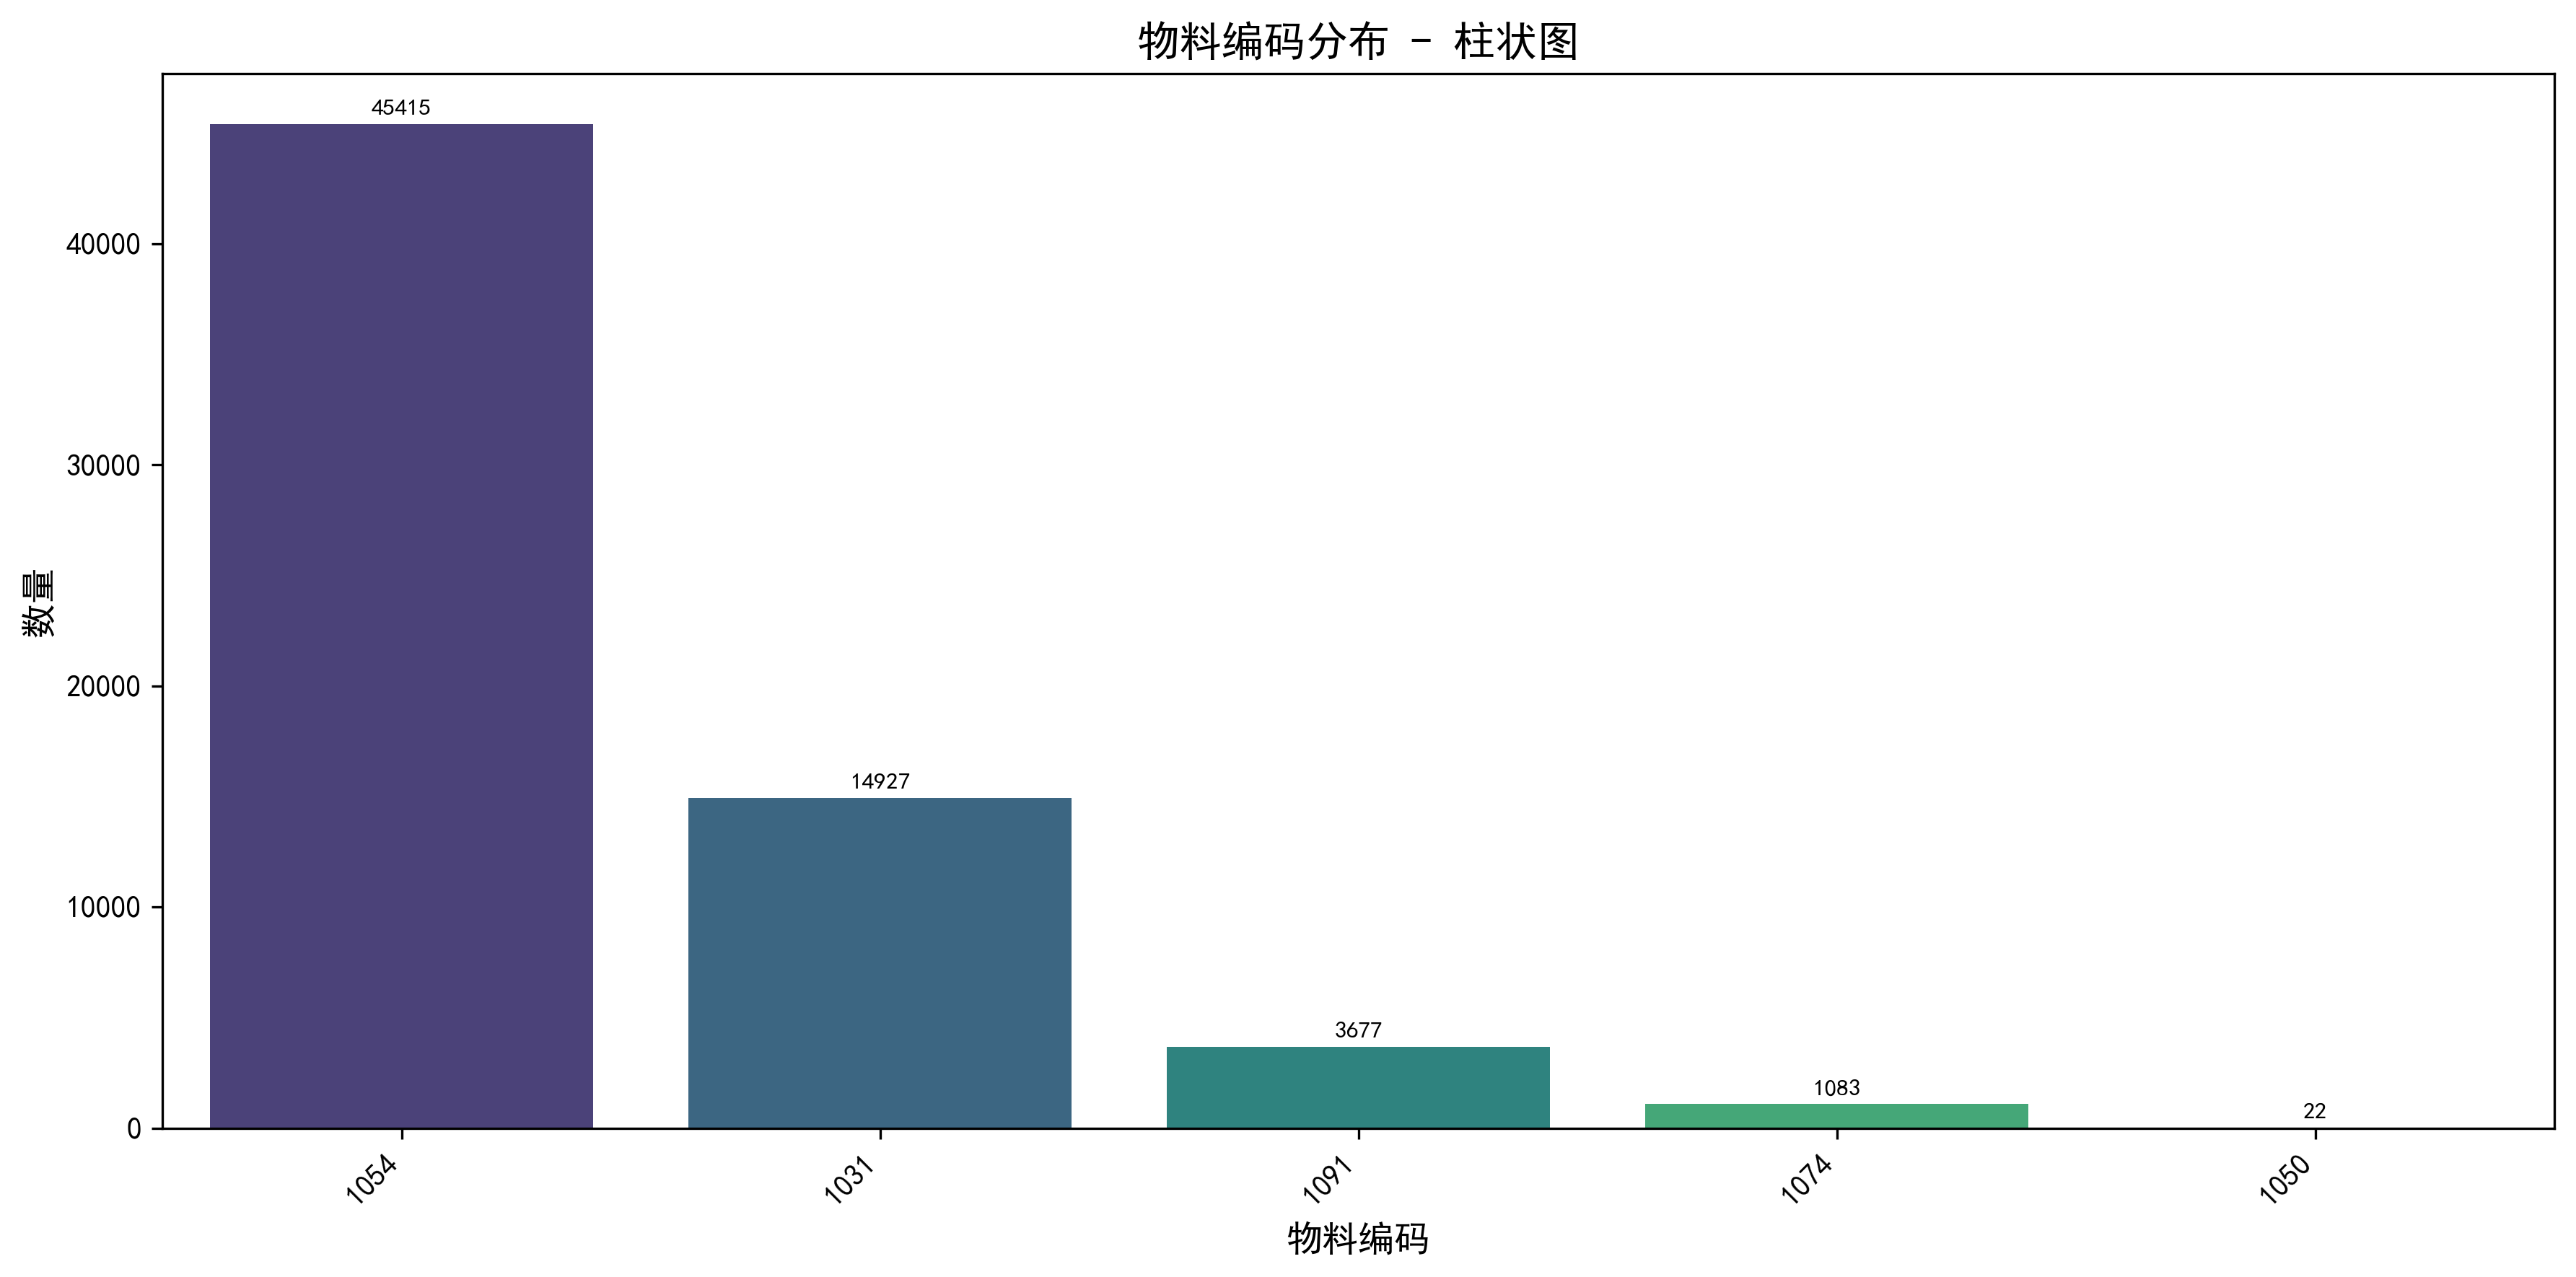

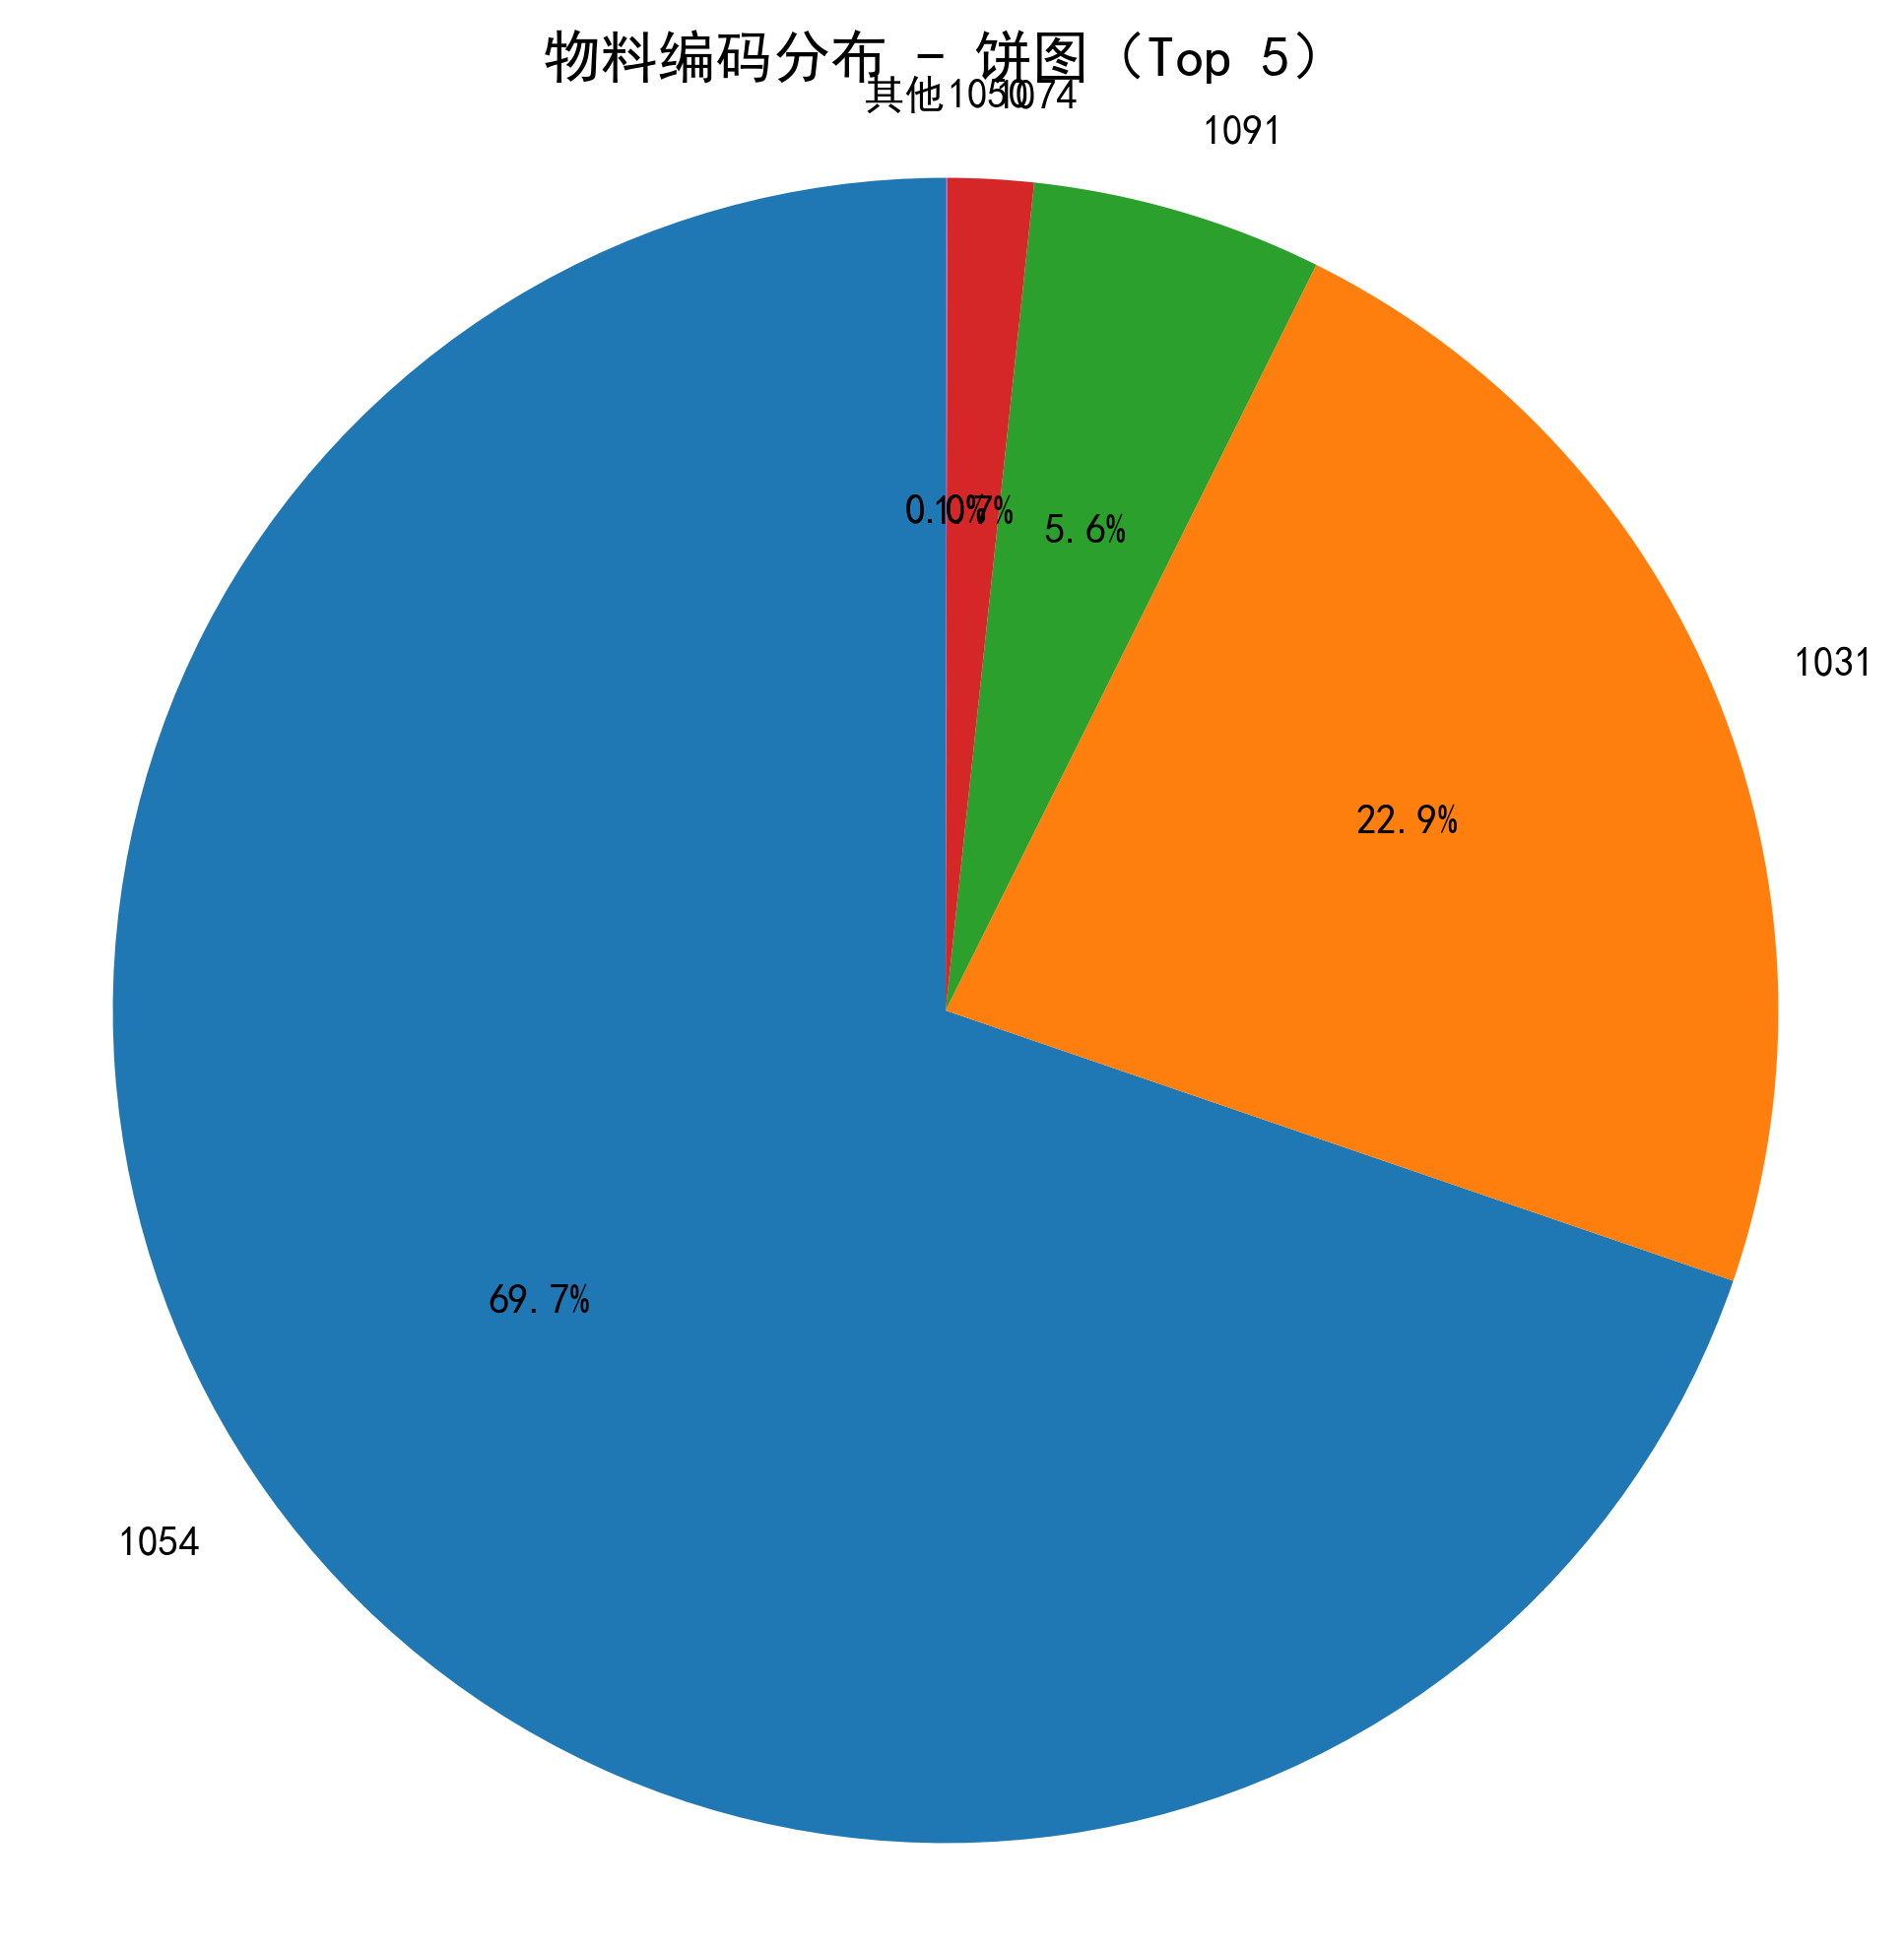

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图参数
plt.rcParams.update({
    'figure.dpi': 300,                # 图片清晰度
    'font.sans-serif': ['SimHei'],    # 中文字体设置
    'axes.unicode_minus': False       # 负号显示修正
})

# 假设df已定义（示例数据）
df = selected_data  # 替换为实际数据

# 1. 物料编码分布柱状图
material_counts = df['物料编码'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=material_counts.index.astype(str),  # 确保x轴为字符串
    y=material_counts.values,
    palette="viridis"                   # 使用更美观的色系
)
plt.title('物料编码分布 - 柱状图', fontsize=14)
plt.xlabel('物料编码', fontsize=12)
plt.ylabel('数量', fontsize=12)
plt.xticks(rotation=45, ha='right')     # 优化标签旋转角度

# 添加数据标签
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=8)

plt.tight_layout()
plt.show()

# 2. 物料编码分布饼图（仅显示前5大类别）
top_n = 5
top_materials = material_counts.head(top_n)
other_count = material_counts[top_n:].sum()

# 合并其他类别
plot_data = pd.concat([top_materials, pd.Series([other_count], index=['其他'])])

plt.figure(figsize=(8, 8))
plt.pie(plot_data,
        labels=plot_data.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10})
plt.title(f'物料编码分布 - 饼图（Top {top_n}）', fontsize=14)
plt.axis('equal')  # 保证圆形
plt.show()

In [32]:
import pandas as pd
import itertools

# 定义特征列表
features = ['工厂编码', '物料编码', '物料品牌', '物料类型', '物料品类']

# 筛选特定物料编码数据
data = selected_data[selected_data['物料编码'] == 1054]

# 生成特征组合对
feature_pairs = list(itertools.combinations(features, 2))

# 检查每对特征关系
for pair in feature_pairs:
    feature1, feature2 = pair
    
    # 分组统计唯一值数量（修正groupby语法）
    unique_counts = data.groupby(feature1)[feature2].nunique()
    
    # 判断是否一一对应
    is_one_to_one = (unique_counts == 1).all()
    
    print(f"\n{'='*30}")
    print(f"特征对：{feature1} vs {feature2}")
    
    if is_one_to_one:
        print("✅ 一一对应关系成立")
    else:
        print("❌ 存在多值对应关系")
        # 展示异常数据
        non_one_to_one = unique_counts[unique_counts > 1]
        print(f"发现 {len(non_one_to_one)} 个异常项：")
        
        for key, count in non_one_to_one.items():
            values = data[data[feature1] == key][feature2].unique()
            print(f"  {feature1}={key} 对应 {count} 个{feature2}值：")
            print(f"  {', '.join(map(str, values.tolist()))}")

# 设置中文字体（如果尚未设置）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


特征对：工厂编码 vs 物料编码
✅ 一一对应关系成立

特征对：工厂编码 vs 物料品牌
✅ 一一对应关系成立

特征对：工厂编码 vs 物料类型
✅ 一一对应关系成立

特征对：工厂编码 vs 物料品类
✅ 一一对应关系成立

特征对：物料编码 vs 物料品牌
✅ 一一对应关系成立

特征对：物料编码 vs 物料类型
✅ 一一对应关系成立

特征对：物料编码 vs 物料品类
✅ 一一对应关系成立

特征对：物料品牌 vs 物料类型
✅ 一一对应关系成立

特征对：物料品牌 vs 物料品类
✅ 一一对应关系成立

特征对：物料类型 vs 物料品类
✅ 一一对应关系成立


In [33]:
data.to_csv('data/sep/factory_2000_3002_4010_1054.csv', index=False)

In [34]:
# 定义特征列表
features = ['工厂编码', '物料编码', '物料品牌', '物料类型', '物料品类']
data = selected_data[selected_data['物料编码'] == 1074]

# 生成特征对
import itertools
feature_pairs = list(itertools.combinations(features, 2))

# 检查每对特征之间的对应关系
for pair in feature_pairs:
    feature1, feature2 = pair
    # 分组统计每个 feature1 对应的 feature2 的唯一值数量
    unique_counts = data.groupby(feature1)[feature2].nunique()
    # 检查是否所有的 feature1 都只对应一个 feature2
    is_one_to_one = (unique_counts == 1).all()
    
    if is_one_to_one:
        print(f"{feature1} 和 {feature2} 是一一对应的。")
    else:
        print(f"{feature1} 和 {feature2} 不是一一对应的。")
        # 打印出那些对应多个 feature2 的 feature1 的情况
        non_one_to_one = unique_counts[unique_counts > 1]
        for key, value in non_one_to_one.items():
            corresponding_values = data[data[feature1] == key][feature2].unique()
            print(f"{feature1} 为 {key} 时，对应 {feature2} 的值有：{corresponding_values}")

工厂编码 和 物料编码 是一一对应的。
工厂编码 和 物料品牌 是一一对应的。
工厂编码 和 物料类型 是一一对应的。
工厂编码 和 物料品类 是一一对应的。
物料编码 和 物料品牌 是一一对应的。
物料编码 和 物料类型 是一一对应的。
物料编码 和 物料品类 是一一对应的。
物料品牌 和 物料类型 是一一对应的。
物料品牌 和 物料品类 是一一对应的。
物料类型 和 物料品类 是一一对应的。


In [35]:
# 将过账日期列转换为 datetime 类型
data['过账日期'] = pd.to_datetime(data['过账日期'])

# 修正拼写错误并获取日期范围
min_date = data['过账日期'].min()  # 原代码错误：.nin() → .min()
max_date = data['过账日期'].max()
time_span = max_date - min_date

print(f"时间跨度: {time_span.days} 天（{min_date} 至 {max_date}）")


时间跨度: 987 天（2018-01-03 00:00:00 至 2020-09-16 00:00:00）
